# Cumulative Precipitation Time Series

#### Aggregate hourly precipitation rate to achieve daily precipitation rate (2017-04-16 to 2017-08-17)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/Toshiba/Documents/GitHub/MIE_2.02_GeoInfo_WS2020/data/generated/DWD/hourly/precipitation/historical/prec_ts_appended_4.csv',sep=";")

In [3]:
data.tail(10)

,mess_datum,station_id,r1,longitude,latitude
244833,2017-08-16 15:00:00,15000,0.0,6.0244,50.7983
244834,2017-08-16 16:00:00,15000,0.0,6.0244,50.7983
244835,2017-08-16 17:00:00,15000,0.0,6.0244,50.7983
244836,2017-08-16 18:00:00,15000,0.2,6.0244,50.7983
244837,2017-08-16 19:00:00,15000,0.0,6.0244,50.7983
244838,2017-08-16 20:00:00,15000,0.0,6.0244,50.7983
244839,2017-08-16 21:00:00,15000,0.0,6.0244,50.7983
244840,2017-08-16 22:00:00,15000,0.0,6.0244,50.7983
244841,2017-08-16 23:00:00,15000,0.0,6.0244,50.7983
244842,2017-08-17 00:00:00,15000,0.0,6.0244,50.7983


In [4]:
import datetime as dt

In [5]:
data['day1'] = pd.to_datetime(data['mess_datum'])

In [6]:
day = data['day1'].dt.date

In [7]:
data.tail()

,mess_datum,station_id,r1,longitude,latitude,day1
244838,2017-08-16 20:00:00,15000,0.0,6.0244,50.7983,2017-08-16 20:00:00
244839,2017-08-16 21:00:00,15000,0.0,6.0244,50.7983,2017-08-16 21:00:00
244840,2017-08-16 22:00:00,15000,0.0,6.0244,50.7983,2017-08-16 22:00:00
244841,2017-08-16 23:00:00,15000,0.0,6.0244,50.7983,2017-08-16 23:00:00
244842,2017-08-17 00:00:00,15000,0.0,6.0244,50.7983,2017-08-17 00:00:00


In [8]:
data['mess_datum']

0         2017-04-16 00:00:00
1         2017-04-16 01:00:00
2         2017-04-16 02:00:00
3         2017-04-16 03:00:00
4         2017-04-16 04:00:00
                 ...         
244838    2017-08-16 20:00:00
244839    2017-08-16 21:00:00
244840    2017-08-16 22:00:00
244841    2017-08-16 23:00:00
244842    2017-08-17 00:00:00
Name: mess_datum, Length: 244843, dtype: object

In [9]:
data['mess_datum']=pd.to_datetime(data.mess_datum, format='%Y/%m/%d %H:%M:%S')

In [10]:
data.insert(loc=6, column='day', value=(data.mess_datum.dt.date))

In [11]:
data.tail()

,mess_datum,station_id,r1,longitude,latitude,day1,day
244838,2017-08-16 20:00:00,15000,0.0,6.0244,50.7983,2017-08-16 20:00:00,2017-08-16
244839,2017-08-16 21:00:00,15000,0.0,6.0244,50.7983,2017-08-16 21:00:00,2017-08-16
244840,2017-08-16 22:00:00,15000,0.0,6.0244,50.7983,2017-08-16 22:00:00,2017-08-16
244841,2017-08-16 23:00:00,15000,0.0,6.0244,50.7983,2017-08-16 23:00:00,2017-08-16
244842,2017-08-17 00:00:00,15000,0.0,6.0244,50.7983,2017-08-17 00:00:00,2017-08-17


In [12]:
#removing a column
del data['day1'] 
#del data['day_new']

In [13]:
type(data['station_id'])

pandas.core.series.Series

Stations of interest in Olpe and Hochsauerlandskreis:
216, 1300, 2483, 2947, 3215, 4488, 5468, 6264, 7330

In [14]:
#data['stations_id'] = int(data['stations_id'])
data['station_id'] = data['station_id'].astype(int)
type(data['station_id'])

pandas.core.series.Series

In [15]:
indx = (data['station_id'] == 216) | (data['station_id'] == 1300) |(data['station_id'] == 2483) | (data['station_id'] == 2947) | (data['station_id'] == 3215) | (data['station_id'] == 4488) | (data['station_id'] == 5468) | (data['station_id'] == 6264) | (data['station_id'] == 7330)

In [16]:
stations_of_interest = data[indx][["mess_datum","station_id", "r1","longitude", "latitude","day"]]

In [17]:
stations_of_interest

,mess_datum,station_id,r1,longitude,latitude,day
0,2017-04-16 00:00:00,216,0.0,7.8807,51.1143,2017-04-16
1,2017-04-16 01:00:00,216,0.1,7.8807,51.1143,2017-04-16
2,2017-04-16 02:00:00,216,0.1,7.8807,51.1143,2017-04-16
3,2017-04-16 03:00:00,216,0.0,7.8807,51.1143,2017-04-16
4,2017-04-16 04:00:00,216,0.0,7.8807,51.1143,2017-04-16
...,...,...,...,...,...,...
215327,2017-08-16 20:00:00,7330,0.0,7.9780,51.4633,2017-08-16
215328,2017-08-16 21:00:00,7330,0.0,7.9780,51.4633,2017-08-16
215329,2017-08-16 22:00:00,7330,0.0,7.9780,51.4633,2017-08-16
215330,2017-08-16 23:00:00,7330,0.0,7.9780,51.4633,2017-08-16


In [18]:
df_1 = stations_of_interest.groupby(['day','station_id'])['r1'].sum().to_frame(name = 'daily_prep').reset_index()

In [19]:
df_1

,day,station_id,daily_prep
0,2017-04-16,216,4.3
1,2017-04-16,1300,3.3
2,2017-04-16,2483,4.4
3,2017-04-16,2947,4.7
4,2017-04-16,3215,1.7
...,...,...,...
987,2017-08-17,2947,0.0
988,2017-08-17,3215,0.0
989,2017-08-17,4488,0.0
990,2017-08-17,6264,0.0


In [20]:
filepathname = "daily_prep_13_counties.csv"
print("df_appended_ts saved to: %s" % (filepathname))
df_1.to_csv(filepathname,sep=";")

df_appended_ts saved to: daily_prep_13_counties.csv


#### Plot of daily precipitation rate over a four months

#### Plotting

Plotting cumulative precipitation 

In [21]:
df_new = df_1.groupby(['day'])['daily_prep'].mean().to_frame(name = 'avg_daily_prep').reset_index()

In [22]:
df_new

,day,avg_daily_prep
0,2017-04-16,3.0375
1,2017-04-17,10.1750
2,2017-04-18,4.7875
3,2017-04-19,0.0000
4,2017-04-20,0.0000
...,...,...
119,2017-08-13,2.5625
120,2017-08-14,0.0000
121,2017-08-15,0.7750
122,2017-08-16,5.9500


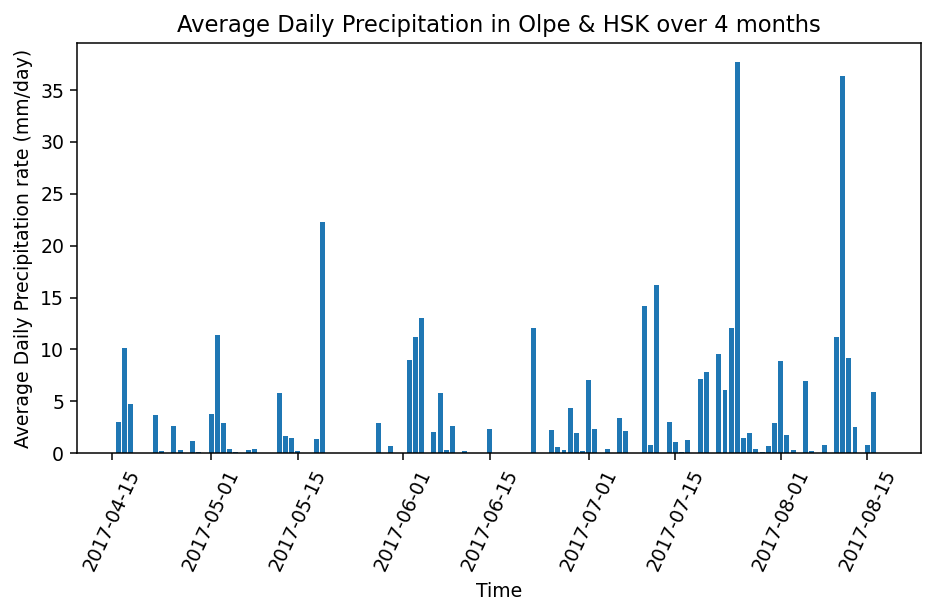

In [23]:
fig = plt.figure(dpi= 136, figsize=(8,4))
plt.bar(x=df_new['day'],height=df_new['avg_daily_prep'])

plt.xlabel('Time')
plt.ylabel('Average Daily Precipitation rate (mm/day)')
plt.title('Average Daily Precipitation in Olpe & HSK over 4 months')
plt.xticks(rotation=65)
plt.savefig('C:/Users/Toshiba/Desktop/Master courses/Geoinformatics/Exercises/Exam files/avg_daily_prec_Olpe_HSK')
plt.show()

#### Creating two data frames for Olpe and Hochsauerlandkreis for plotting as separate graphs in the same diagram

In [24]:
olpe = df_1[df_1['station_id'].isin([216,2947,5468])]#216, 2947,5468 olpe stations

hochsauerlandkreis = df_1[df_1['station_id'].isin([1300,2483,3215,4488,6264,7330])]#1300, 2483, 3215, 4488, 6264, 7330 hochsauerlandkreis stations

In [25]:
olpe

,day,station_id,daily_prep
0,2017-04-16,216,4.3
3,2017-04-16,2947,4.7
8,2017-04-17,216,14.6
11,2017-04-17,2947,12.0
16,2017-04-18,216,2.6
...,...,...,...
971,2017-08-15,2947,0.3
976,2017-08-16,216,11.7
979,2017-08-16,2947,7.1
984,2017-08-17,216,0.0


#### Average daily precipitation values of all stations in Olpe and Hochsauerlandkreis 

In [26]:
df_2 = olpe.groupby(['day'])['daily_prep'].mean().to_frame(name = 'Olpe_avg_daily_prep').reset_index()
df_3 = hochsauerlandkreis.groupby(['day'])['daily_prep'].mean().to_frame(name = 'HSK_avg_daily_prep').reset_index()

In [27]:
df_2

,day,Olpe_avg_daily_prep
0,2017-04-16,4.50
1,2017-04-17,13.30
2,2017-04-18,3.35
3,2017-04-19,0.00
4,2017-04-20,0.00
...,...,...
119,2017-08-13,4.05
120,2017-08-14,0.00
121,2017-08-15,0.85
122,2017-08-16,9.40


In [28]:
df_2.insert(loc=2, column='Olpe_cumulative_prec', value=(np.cumsum(df_2['Olpe_avg_daily_prep'])))

In [29]:
df_3.insert(loc=2, column='HSK_cumulative_prec', value=(np.cumsum(df_3['HSK_avg_daily_prep'])))

In [30]:
df_3.tail()

,day,HSK_avg_daily_prep,HSK_cumulative_prec
119,2017-08-13,2.066667,392.40
120,2017-08-14,0.000000,392.40
121,2017-08-15,0.750000,393.15
122,2017-08-16,4.800000,397.95
123,2017-08-17,0.000000,397.95


#### Plotting Olpe and Hochsauerlandkreis separately in one diagram

The diagram shows average daily precipitation rate in Olpe(red color) and in Hocsauerlandskreis(blue color)

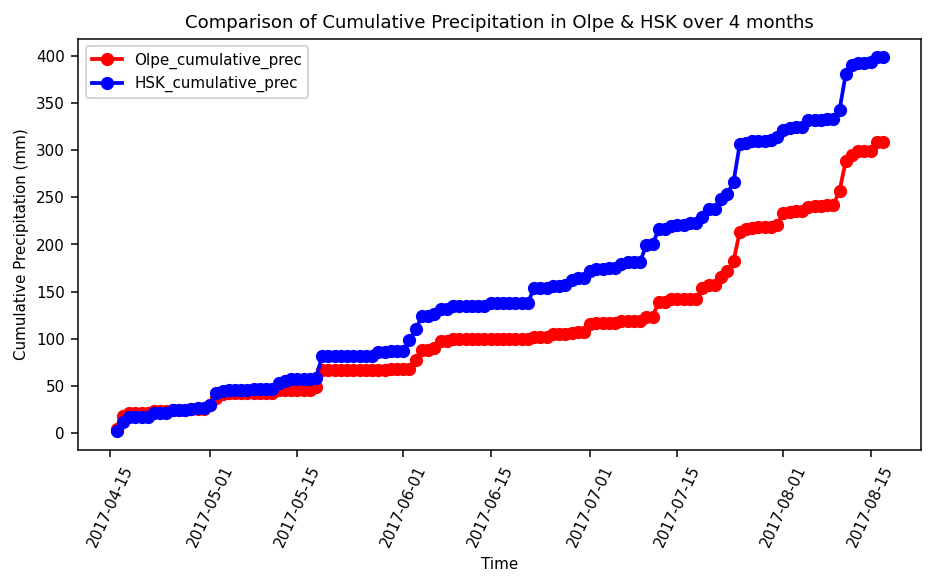

In [31]:
fig = plt.figure(dpi= 136, figsize=(8,4))
plt.rcParams.update({'font.size': 8})

plt.plot('day','Olpe_cumulative_prec',  data=df_2, marker='o', markerfacecolor='red',  color='red', linewidth=2)
plt.plot('day','HSK_cumulative_prec',  data=df_3, marker='o', markerfacecolor='blue',  color='blue', linewidth=2)
plt.legend()

plt.xlabel('Time')
plt.ylabel('Cumulative Precipitation (mm)')
plt.title('Comparison of Cumulative Precipitation in Olpe & HSK over 4 months')
plt.xticks(rotation=65)
plt.savefig('C:/Users/Toshiba/Desktop/Master courses/Geoinformatics/Exercises/Exam files/cumulative_prec_Olpe_HSK')
#216, 1300, 2483, 2947, 3215, 4488, 5468, 6264, 7330 - station IDs

plt.show()